# Evaluación Parcial 3 Caso Counter Strike

- Profesor: Felipe Zambrano

### Instrucciones generales

- Los grupos son los mismos de la Evaluación Parcial 3.
- Esta prohibido compartir las respuestas con otros grupos.
- Indicios de copia serán penalizados con la nota mínima.
- Cualquier duda fuera del horario de clases se debe enviar por el AVA. Mensajes al docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente, si utiliza material extra debe citarlo.

### Sobre la entrega
  * Antes de comenzar a realizar la evaluación, guarde una copia de este cuadernillo en su Google Drive (`Archivo > Guardar una copia en Drive`). No hacer esto puede implicar que su trabajo no se guarde correctamente.
  *  Debe descargar este cuardenillo de Google Colab como un archivo `.ipynb` (`Archivo > Descargar > Descargar .ipynb`). No se revisarán otros formatos de entrega. Recurde guardar su desarrollo antes de descargar el archivo correspondiente.
  *  El archivo debe ser reproducible, o sea si cargo el archivo en Google Colab y ejecuto todas las celdas, debe reproducir los resultados que usted obtuvo.
  *  Se debe subir el archivo `.ipynb` descargado al AVA en el apartado Experiencia de Aprendizaje 3: Machine Learning Aplicado - Modelos de Regresión -> Evaluación parcial 3: Modelos de Regresión.
  *  La fecha límite de entrega es el **miércoles 12 de junio a las 23:59 hrs**. Por cada hora de retraso, se descontará un punto de la nota final. Ejemplo: Si entrega entre 00:00 y 00:59, la nota máxima será 6.0. Si entrega entre 01:00 y 01:59, la nota máxima será 5.0, etc.
  *  Ante cualquier sospecha de copia, reprobarán automáticamente el curso con nota mínima (1.0) los involucrados. La discusión entre pares siempre es beneficiosa y fomenta diálogos interesantes, pero cada uno debe desarrollar su propio trabajo.
  * El cálculo de la nota de la evaluación esta dado por: $\text{Nota}=1+{\sum_{i=1}^7\text{PuntajePregunta}_i \over 7}$


### Grupo Nº
> 9

### Integrantes del grupo

> Antonia Navarrete, Sebastian Gallardo, Javier Gonazles.

In [1]:
# Importe las librerías que estime necesario
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = 'https://raw.githubusercontent.com/fzambran/Fundamentos-ML/main/Dataset-E2/01%20demo_round_traces.csv'
df_counter = pd.read_csv(url, sep = ';')

<ipython-input-2-909328684196>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_counter = pd.read_csv(url, sep = ';')


In [3]:
list(df_counter.columns.values)

['Unnamed: 0',
 'Map',
 'Team',
 'InternalTeamId',
 'MatchId',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots']

**1.** **[6 pts]** Describa los atributos del dataset usando lenguaje Markdown.

El dataset contiene los siguientes atributos:
- **Map**: Nombre del mapa donde se jugó la partida.
- **Team**: Nombre del equipo al que pertenece el jugador.
- **InternalTeamID**: Identificador del equipo al que pertenece el jugador.
- **MatchId**: Identificador de la partida.
- **RoundId**: Identificador de la ronda de la partida
- **RoundWinner**: Indica si el jugador ganó o no la ronda analizada.
- **MatchWinner**: Indica si el jugador ganó o no la partida.
- **Survived**: Indica si el jugador subrevivió o no al final de la ronda (sobrevivir no es sinónimo de ganar).
- **AbnormalMatch**: Indica si la partida del jugador tuvo un error por conexión de red.
- **TimeAlive**: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego.
- **TravelledDistance**: Distancia viajada por el jugador durante la partida.
- **RLethalGrenadesThrown**: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
- **RNonLethalGrenadesThrown**: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
- **PrimaryAssaultRifle, PrimarySniperRifle,PrimaryHeavy,PrimarySMG, PrimaryPistol**: Porcentaje de uso de arma clasificada como primaria, categorizadas en AssaultRifle,SniperRifle,SMG,Heavy y Pistol.
- **FirstKillTime** : Tiempo que tardó el jugador en realizar su primera kill de la ronda (si no obtuvo ninguna kill, entonces el valor es 0)
- **RoundKills** : Cantidad de kills efectuados por el jugador durante la ronda.
- **RoundAssists**: Cantidad de asistencias efectuadas por el jugador durante la ronda.
- **RoundHeadshots** : Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la ronda.
- **RoundFlankKills**: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la ronda.
- **RoundStartingEquipmentValue**: Valor del equipamiento llevado por el jugador al inicio de la ronda.
- **TeamStartingEquipmentValue**: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.
- **MatchKills**: Cantidad de kills efectuadas por el jugador durante la partida hasta al fin de la ronda indicada.
- **MatchFlankKills**: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida hasta al fin de la ronda indicada.
- **MatchAssists**: Cantidad de asistencias efectuadas por el jugador durante la partida hasta al fin de la ronda indicada.
- **MatchHeadshots** : Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida hasta al fin de la ronda indicada.

**2.** **[6 pts]** En relación a la entrega anterior. Identifique oportunidades de mejora que permitan una mejor compresión de los datos. Utilice gráficos y/o análisis

Sabemos que con la información anterior se pueden sacar diversas oportunidades donde afectara en como se valoren los datos, es por eso que se mostraran el posible manejo de datos que se pueden llegar a obtener.


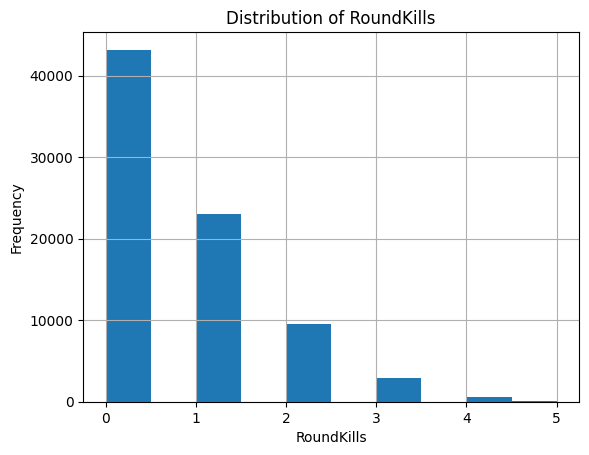

In [4]:
# Histograma de RoundKills
df_counter['RoundKills'].hist()
plt.xlabel('RoundKills')
plt.ylabel('Frequency')
plt.title('Distribution of RoundKills')
plt.show()

Este histograma nos permite saber la cantidad de kills que efectuan los jugadores por ronda, con eso sabemos los que mas valor tienen, ya que generan un amenaza a equipos rivales, donde se tomara como prioridad sacar de juego dicho jugador.

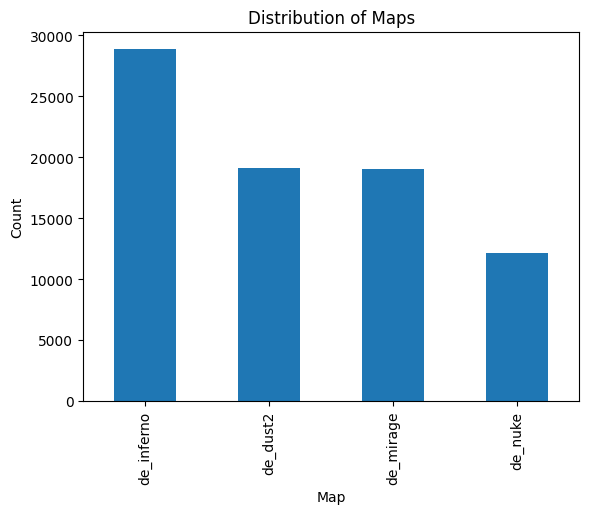

In [5]:
# Gráfico de barras de Map
df_counter['Map'].value_counts().plot(kind='bar')
plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Distribution of Maps')
plt.show()

La cantidad de veces que se eligio el mapa, por lo cual se verifica el preferido por los jugadores y saber como poder hacer posibles cambios que mejoren la experiencia del los jugadores.

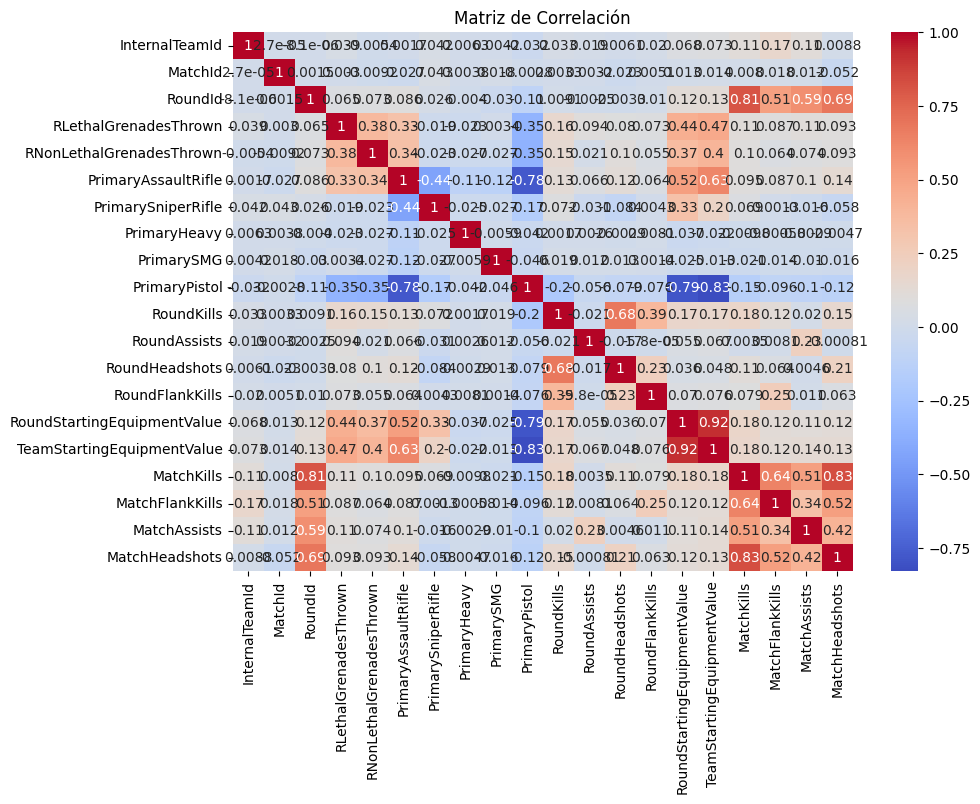

In [6]:
# Para realizar la matriz de correlacion, necesitamos contar con solo los datos que sean int o float
df_numerico = df_counter.select_dtypes(include=['int', 'float'])
df_numerico_sin_unnamed = df_numerico.drop(columns=['Unnamed: 0'])

# Con el dataframe listo obtenemos la matriz de correlación
plt.figure(figsize=(10, 7))
sns.heatmap(df_numerico_sin_unnamed.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Con esta matriz obtenemos la relación que tienen los datos, por lo cual es preciso contar con una para saber como realizar correctamente el analisis de estos datos y que valor entregaran.

**3.** **[6 pts]** Defina las variables dependientes (X) y la variable objetivo (Y) para el modelo de regresión.

In [7]:
X = ['Map', 'Team', 'InternalTeamID', 'MatchId', 'RoundId', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance',
     'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG',
     'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
     'TeamStartingEquipmentValue']
Y = ['MatchWinner', 'RoundWinner', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

tabla = pd.DataFrame({'Variable': X + Y,
                       '      Tipo de Variable': ['Dependiente'] * len(X) + ['Objetivo'] * len(Y)})
print(tabla)

                       Variable       Tipo de Variable
0                           Map            Dependiente
1                          Team            Dependiente
2                InternalTeamID            Dependiente
3                       MatchId            Dependiente
4                       RoundId            Dependiente
5                      Survived            Dependiente
6                 AbnormalMatch            Dependiente
7                     TimeAlive            Dependiente
8             TravelledDistance            Dependiente
9         RLethalGrenadesThrown            Dependiente
10     RNonLethalGrenadesThrown            Dependiente
11          PrimaryAssaultRifle            Dependiente
12           PrimarySniperRifle            Dependiente
13                 PrimaryHeavy            Dependiente
14                   PrimarySMG            Dependiente
15                PrimaryPistol            Dependiente
16                FirstKillTime            Dependiente
17        

**4.** **[6 pts]** Separe el dataset en train y test usando `scikit-learn`. El como procese el dataset para el input de los modelos queda a su criterio.

In [8]:
print(df_counter.columns)

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split

X = df_counter.drop('MatchWinner', axis=1)  # características
y = df_counter['FirstKillTime']  # variable objetivo

#80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento (train):", X_train.shape, y_train.shape)
print("Conjunto de prueba (test):", X_test.shape, y_test.shape)

Conjunto de entrenamiento (train): (63325, 29) (63325,)
Conjunto de prueba (test): (15832, 29) (15832,)


In [10]:
df_counter.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [11]:
duplicates_count = df_counter.duplicated().sum()
print(f'Cantidad de duplicados: {duplicates_count}')

Cantidad de duplicados: 0


In [12]:
duplicates = df_counter[df_counter.duplicated()]
duplicates

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots


In [13]:
#Eliminar datos duplicados
df_counter = df_counter.drop_duplicates()
df_counter.duplicated().sum()

0

In [14]:
list(df_counter.columns.values)

['Unnamed: 0',
 'Map',
 'Team',
 'InternalTeamId',
 'MatchId',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots']

In [15]:
df_counter.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [16]:
df_counter.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

**5.** **[6 pts]** Entrene al menos 3 alternativas de modelos de
regresión seleccionando cual es el que se adapta
mejor a los datos dada la naturaleza del algoritmo
implementado.

Error cuadrático medio (MSE): 19.445461862601437
Coeficiente de determinación (R^2): 0.6484395705831865
Error absoluto medio (MAE): 3.5554938265312344
Raíz del Error Cuadrático Medio (RMSE): 4.409700881307193


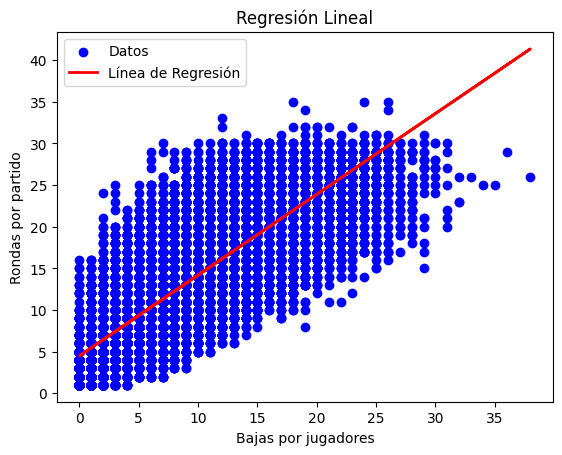

In [17]:
# Responda aquí:
# Modelo número 1: relacion entre MatchKills y RoundId

 # Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_numerico_sin_unnamed['MatchKills'], df_numerico_sin_unnamed['RoundId'], test_size=0.3, random_state=42)

# Se crea el modelo de regresion lineal
modelo = LinearRegression()

# Se entrena el modelo con los datos de entrenamiento
modelo.fit(X_train.values.reshape(-1, 1), y_train)

# hacemos prediciones
y_pred = modelo.predict(X_test.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

# Graficamos los datos y la linea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Bajas por jugadores')
plt.ylabel('Rondas por partido')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 1.2077824000977533
Coeficiente de determinación (R^2): 0.41104678399109496
Error absoluto medio (MAE): 0.7966412857187837
Raíz del Error Cuadrático Medio (RMSE): 1.098991537773496


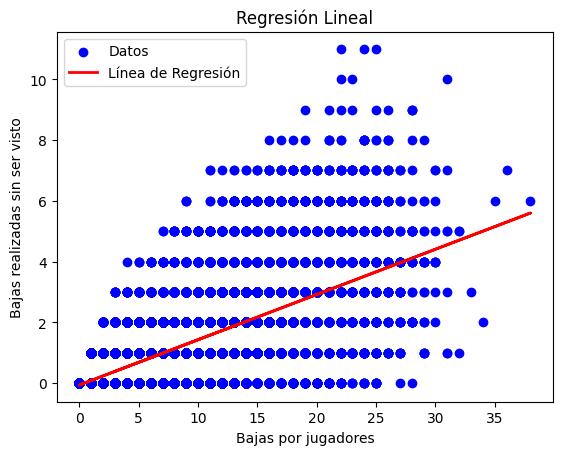

In [18]:
 # Modelo número 2: relación entre MatchKills y MatchFlanKills
 # Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_numerico_sin_unnamed['MatchKills'], df_numerico_sin_unnamed['MatchFlankKills'], test_size=0.3, random_state=42)

# Se crea el modelo de regresion lineal
modelo = LinearRegression()

# Se entrena el modelo con los datos de entrenamiento
modelo.fit(X_train.values.reshape(-1, 1), y_train)

# hacemos prediciones
y_pred = modelo.predict(X_test.values.reshape(-1, 1))

mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))

print("Error cuadrático medio (MSE):", mse_2)
print("Coeficiente de determinación (R^2):", r2_2)
print("Error absoluto medio (MAE):", mae_2)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_2)

# Graficamos los datos y la linea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Bajas por jugadores')
plt.ylabel('Bajas realizadas sin ser visto')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 3.2661901670123608
Coeficiente de determinación (R^2): 0.6902729732901061
Error absoluto medio (MAE): 1.302841866760608
Raíz del Error Cuadrático Medio (RMSE): 1.8072604037637634


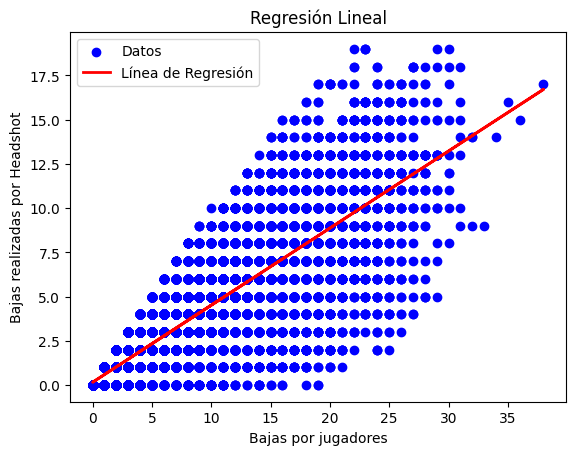

In [19]:
 # Modelo número 3: relación entre MatchKills y MatchHeadshots
 # Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_numerico_sin_unnamed['MatchKills'], df_numerico_sin_unnamed['MatchHeadshots'], test_size=0.3, random_state=42)

# Se crea el modelo de regresion lineal
modelo = LinearRegression()

# Se entrena el modelo con los datos de entrenamiento
modelo.fit(X_train.values.reshape(-1, 1), y_train)

# hacemos prediciones
y_pred = modelo.predict(X_test.values.reshape(-1, 1))


mse_3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)
mae_3 = mean_absolute_error(y_test, y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred))

print("Error cuadrático medio (MSE):", mse_3)
print("Coeficiente de determinación (R^2):", r2_3)
print("Error absoluto medio (MAE):", mae_3)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_3)

# Graficamos los datos y la linea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Bajas por jugadores')
plt.ylabel('Bajas realizadas por Headshot')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

**6.** **[6 pts]** Utilice las métricas para evaluar los modelos e interprete los resultados basándose en el tipo de tarea desarrollada, y considerando al menos el coef. de determinación, MAE,
MSE y RMSE.

In [20]:
# Responda aquí:

# Modelo 1

print("Modelo 1:")
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("\n")
# Modelo 2

print("Modelo 2:")
print("Error cuadrático medio (MSE):", mse_2)
print("Coeficiente de determinación (R^2):", r2_2)
print("Error absoluto medio (MAE):", mae_2)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_2)
print("\n")

# Modelo 3

print("Modelo 3:")
print("Error cuadrático medio (MSE):", mse_3)
print("Coeficiente de determinación (R^2):", r2_3)
print("Error absoluto medio (MAE):", mae_3)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_3)


Modelo 1:
Error cuadrático medio (MSE): 19.445461862601437
Coeficiente de determinación (R^2): 0.6484395705831865
Error absoluto medio (MAE): 3.5554938265312344
Raíz del Error Cuadrático Medio (RMSE): 4.409700881307193


Modelo 2:
Error cuadrático medio (MSE): 1.2077824000977533
Coeficiente de determinación (R^2): 0.41104678399109496
Error absoluto medio (MAE): 0.7966412857187837
Raíz del Error Cuadrático Medio (RMSE): 1.098991537773496


Modelo 3:
Error cuadrático medio (MSE): 3.2661901670123608
Coeficiente de determinación (R^2): 0.6902729732901061
Error absoluto medio (MAE): 1.302841866760608
Raíz del Error Cuadrático Medio (RMSE): 1.8072604037637634


Modelo 1:


*   El MSE y RMSE indican que el modelo tiene un error moderado.
*   El MAE proporciona una medida de error promedio de 3.56, lo que puede ser interpretado como la desviación promedio de las predicciones del modelo con respecto a los valores reales.
*   El R² de 0.648 muestra que el modelo explica una proporción decente de la variabilidad en los datos, pero hay espacio para mejorar.


Modelo 2:


*   El modelo tiene un rendimiento moderado con un R² de 0.4110, lo que
significa que hay margen de mejora.
*   El MSE y el RMSE indican que el modelo no tiene un ajuste perfecto, pero los errores son razonables.
*   El MAE también sugiere que los errores promedio son moderadamente pequeños.


Modelo 3:


*   El modelo tiene un rendimiento aceptable con un R² de 0.6903, lo que indica que aproximadamente el 69% de la variabilidad en los datos es explicada por el modelo, dejando margen para posibles mejoras.
*   El MSE y el RMSE muestran que el ajuste del modelo no es perfecto, pero los errores son moderados y aceptables, con un RMSE de 1.807.
*   El MAE, con un valor de 1.3028, sugiere que los errores promedio son razonablemente bajos, lo que indica una precisión moderada en las predicciones del modelo.



**7.** **[6 pts] Justifique cuál es el mejor modelo entrenado de acuerdo con el resultado obtenido considerando el problema de regresión con las métricas correspondientes.


El **Modelo 2** destaca como el mejor, con un MAE de 0.7966, lo que indica que las predicciones tienen un error promedio muy bajo. Aunque su R² es 0.4110, lo que sugiere que solo explica una parte moderada de la variabilidad en los datos, su precisión en los errores promedio es superior a los otros modelos.

El **Modelo 3** también muestra un rendimiento sólido con un R² de 0.6903 y un MAE de 1.3028, indicando una buena capacidad para explicar la variabilidad y mantener errores moderadamente bajos.

Por otro lado, el **Modelo 1** tiene un R² de 0.648 y un MAE de 3.56, lo que sugiere que, aunque tiene un ajuste moderado, hay espacio significativo para mejorar en términos de precisión y capacidad explicativa.

En resumen, el Modelo 2 es el más preciso en términos de error absoluto promedio, aunque hay espacio para mejorar en la explicación de la variabilidad de los datos. El Modelo 3 es una opción sólida, mientras que el Modelo 1, aunque decente, tiene mayor margen de mejora.

